# Seattle Fremont Bridge Bicycle Counter

####  

In [1]:
URL="https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(URL,"Fremont.csv")

('Fremont.csv', <http.client.HTTPMessage at 0x7fb7a0799150>)

In [4]:
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,13,4,9
10/03/2012 01:00:00 AM,10,4,6
10/03/2012 02:00:00 AM,2,1,1
10/03/2012 03:00:00 AM,5,2,3
10/03/2012 04:00:00 AM,7,6,1
10/03/2012 05:00:00 AM,31,21,10
10/03/2012 06:00:00 AM,155,105,50
10/03/2012 07:00:00 AM,352,257,95
10/03/2012 08:00:00 AM,437,291,146


In [5]:
import pandas as pd
data=pd.read_csv("Fremont.csv",header=0,index_col="Date",parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [6]:
 %matplotlib notebook

<IPython.core.display.Javascript object>


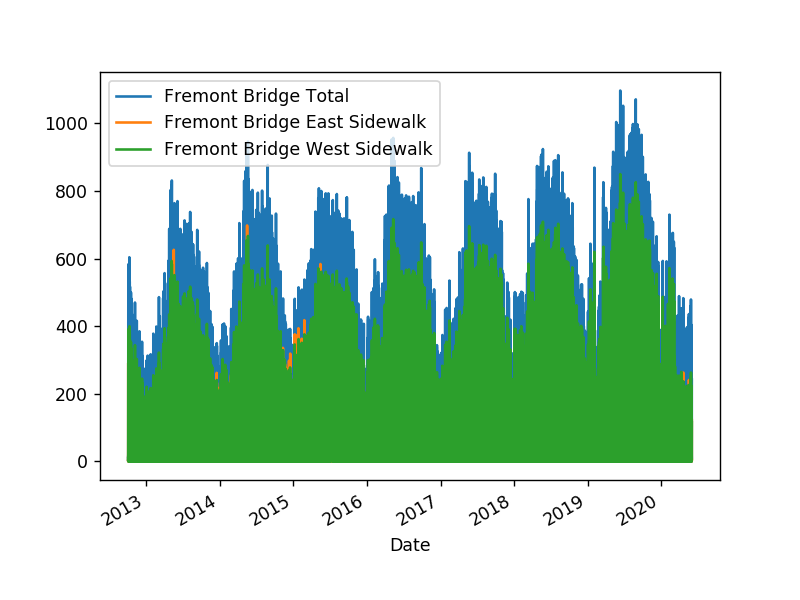

In [7]:
data.plot();

<IPython.core.display.Javascript object>


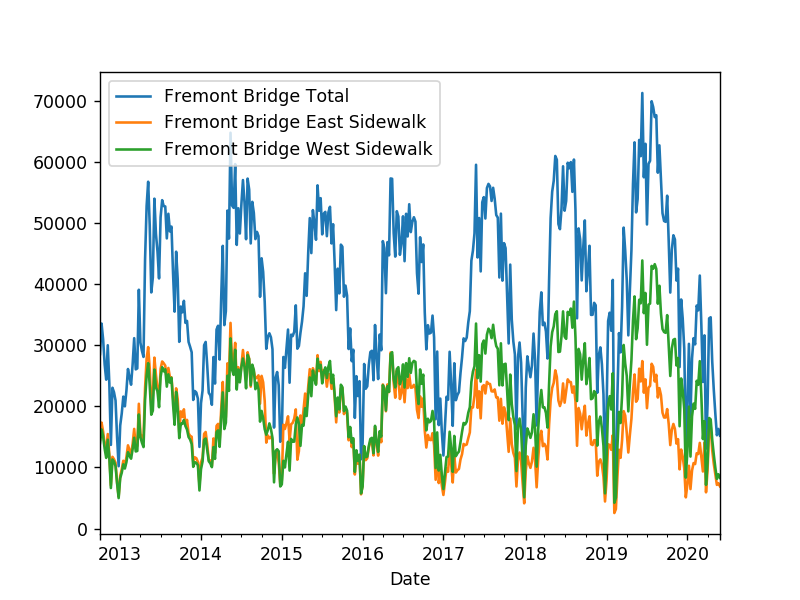

In [8]:
data.resample("W").sum().plot();

## Part 2:Further Data Exploration

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn

In [10]:
plt.style.use("seaborn")

In [11]:
data.columns.values

array(['Fremont Bridge Total', 'Fremont Bridge East Sidewalk',
       'Fremont Bridge West Sidewalk'], dtype=object)

<IPython.core.display.Javascript object>


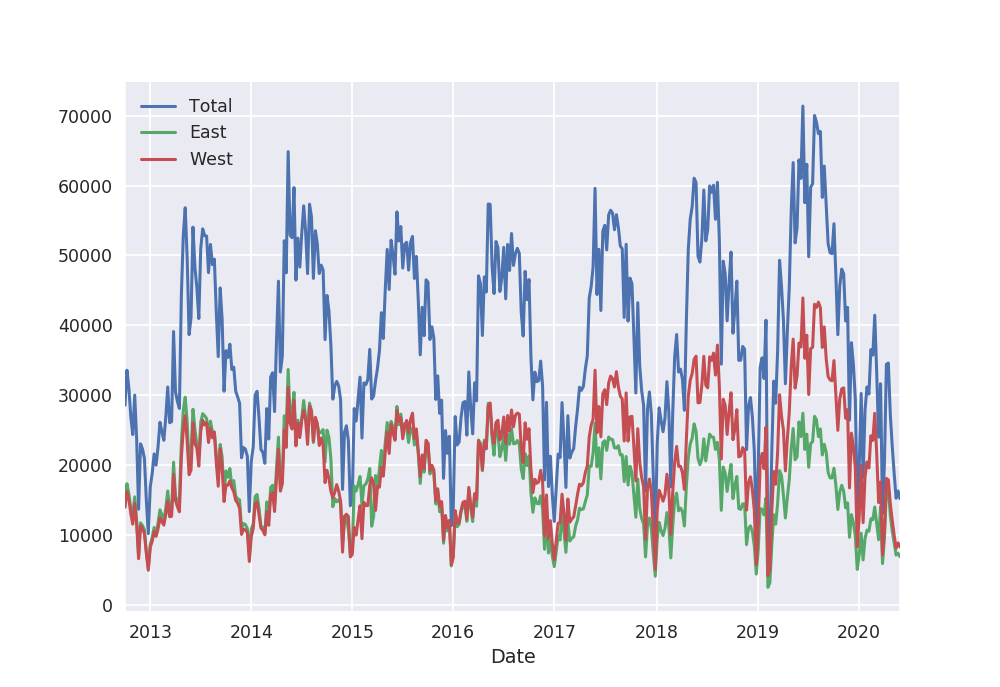

In [12]:
data.columns=["Total","East","West"]
data.resample("W").sum().plot();

<IPython.core.display.Javascript object>


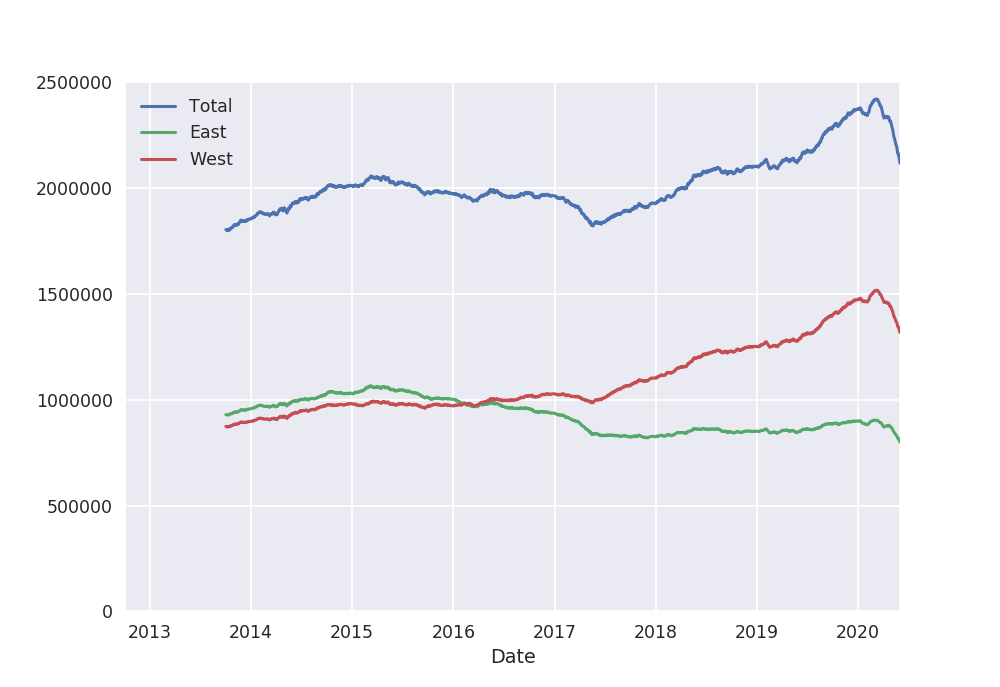

In [13]:
ax=data.resample("D").sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

<IPython.core.display.Javascript object>


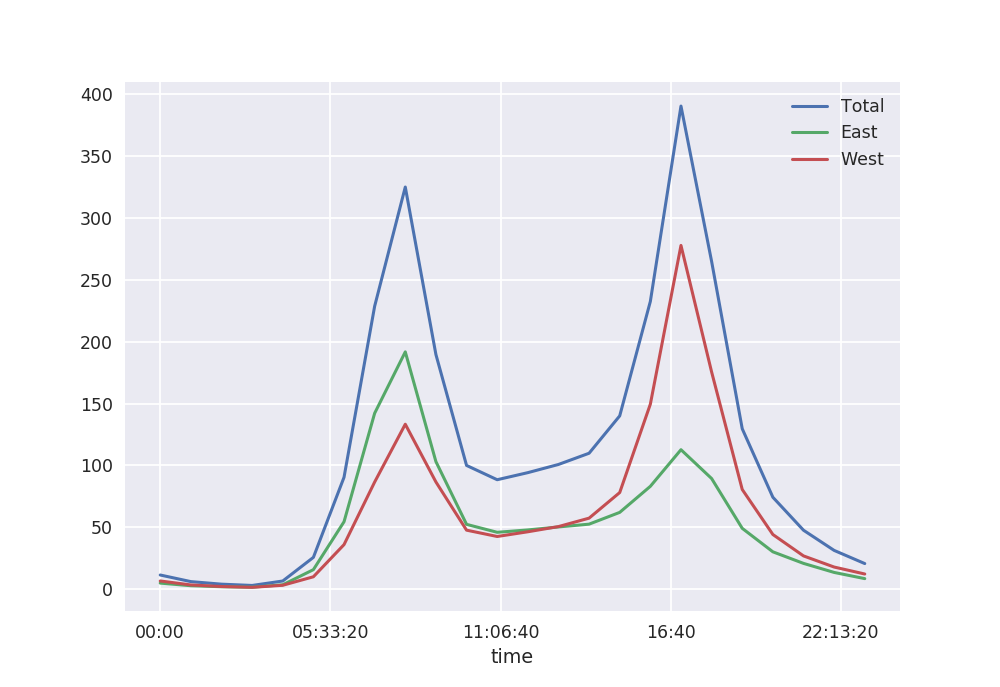

In [14]:
data.groupby(data.index.time).mean().plot();

In [15]:
pivoted=data.pivot_table("Total",index=data.index.time,columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<IPython.core.display.Javascript object>


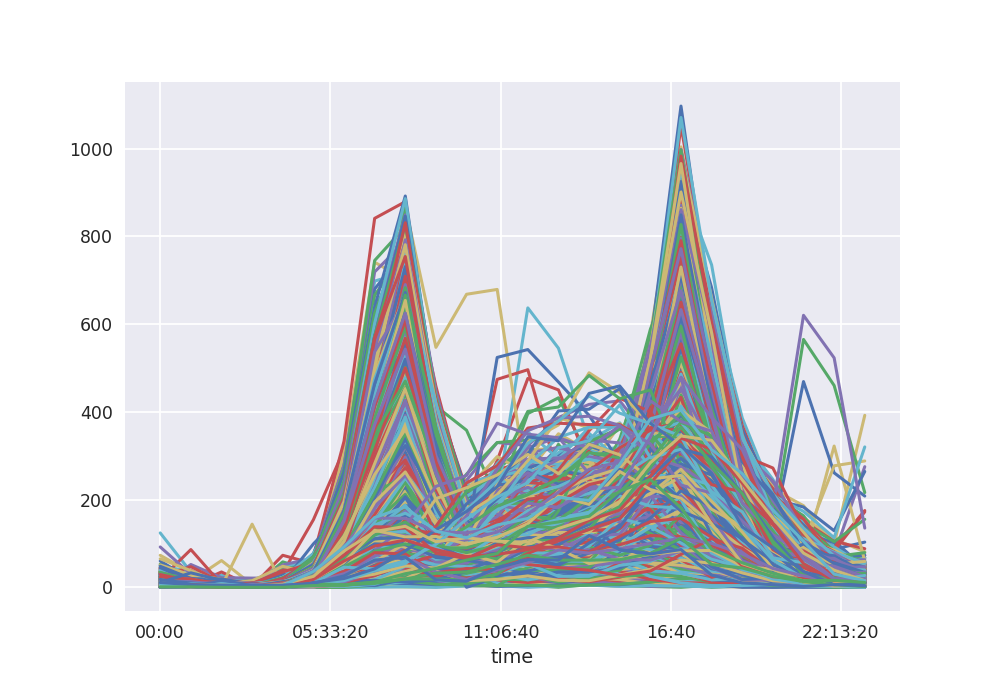

In [16]:
pivoted.plot(legend=False);

<IPython.core.display.Javascript object>


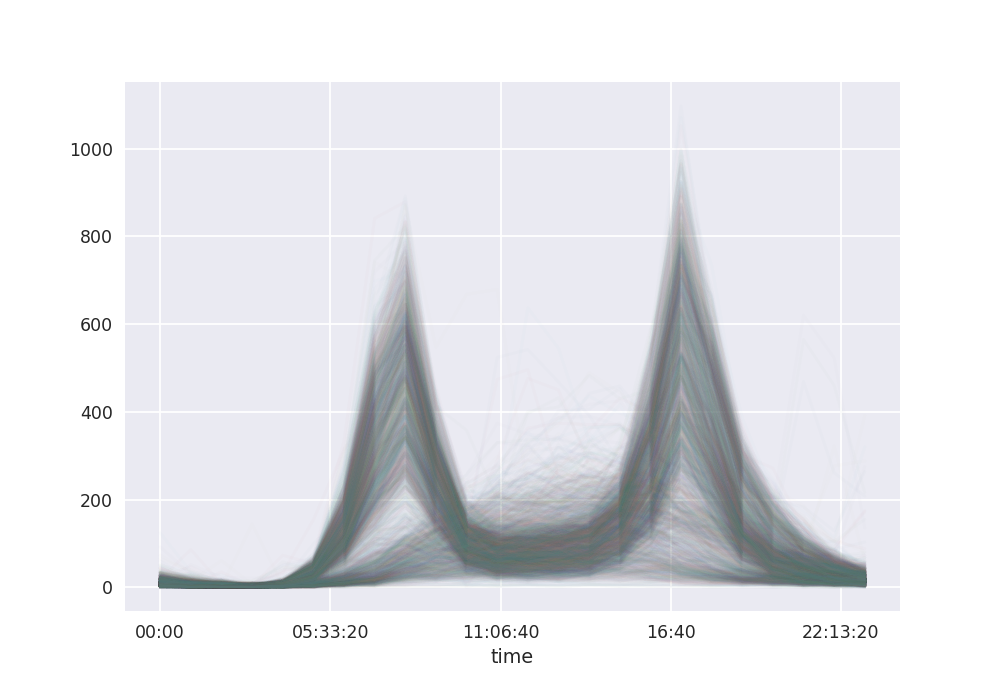

In [17]:
pivoted.plot(legend=False,alpha=0.015);